# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | kamina
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | bay roberts
Processing Record 6 of Set 1 | nisia floresta
Processing Record 7 of Set 1 | kushmurun
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | mamallapuram
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | hervey bay
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | goderich
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | saint-philippe
Pr

Processing Record 41 of Set 4 | dubbo
Processing Record 42 of Set 4 | balikpapan
Processing Record 43 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 44 of Set 4 | angra
City not found. Skipping...
Processing Record 45 of Set 4 | tadine
Processing Record 46 of Set 4 | belyy yar
Processing Record 47 of Set 4 | belaya gora
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | port lincoln
Processing Record 0 of Set 5 | iquique
Processing Record 1 of Set 5 | harper
Processing Record 2 of Set 5 | baryshivka
Processing Record 3 of Set 5 | mopipi
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | port hueneme
Processing Record 6 of Set 5 | mitchell
Processing Record 7 of Set 5 | morgan city
Processing Record 8 of Set 5 | cidreira
Processing Record 9 of Set 5 | kavieng
Processing Record 10 of Set 5 | rawson
Processing Record 11 of Set 5 | ust-kuyga
Processing Record 12 of Set 5 | carutapera
Processing Record 13 of Set 5 | vila velha

Processing Record 29 of Set 8 | mangla
Processing Record 30 of Set 8 | berlevag
Processing Record 31 of Set 8 | san remo
Processing Record 32 of Set 8 | faya
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | haibowan
City not found. Skipping...
Processing Record 35 of Set 8 | merrill
Processing Record 36 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 37 of Set 8 | sergeyevka
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | juegang
Processing Record 40 of Set 8 | kopavogur
Processing Record 41 of Set 8 | labelle
Processing Record 42 of Set 8 | saint-augustin
Processing Record 43 of Set 8 | meyungs
City not found. Skipping...
Processing Record 44 of Set 8 | tutoia
Processing Record 45 of Set 8 | pimentel
Processing Record 46 of Set 8 | kokopo
Processing Record 47 of Set 8 | ituni
City not found. Skipping...
Processing Record 48 of Set 8 | rameswaram
Processing Record 49 of Set 8 | nishihara
Processing Record 0 of Set 9 | n

Processing Record 17 of Set 12 | ravar
Processing Record 18 of Set 12 | paris
Processing Record 19 of Set 12 | auki
Processing Record 20 of Set 12 | cam pha
City not found. Skipping...
Processing Record 21 of Set 12 | eureka
Processing Record 22 of Set 12 | vitim
Processing Record 23 of Set 12 | mocambique
City not found. Skipping...
Processing Record 24 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 25 of Set 12 | beyla
Processing Record 26 of Set 12 | tsiroanomandidy
Processing Record 27 of Set 12 | alyangula
Processing Record 28 of Set 12 | cedar city
Processing Record 29 of Set 12 | rohnert park
Processing Record 30 of Set 12 | pierre
Processing Record 31 of Set 12 | sorong
Processing Record 32 of Set 12 | issenye
Processing Record 33 of Set 12 | namie
Processing Record 34 of Set 12 | fukue
Processing Record 35 of Set 12 | gizo
Processing Record 36 of Set 12 | prabumulih
Processing Record 37 of Set 12 | santa barbara
Processing Record 38 of Set 12 | mezen
Proces

In [4]:
# Export the city data into a .csv.
# Display the DataFrame

city_data_pd = pd.DataFrame(city_data)
city_data_pd.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
city_data_pd.to_csv('city_data_pd.csv')

In [6]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,55.99,28,0,17.22,AR,1597681571
1,atuona,-9.80,-139.03,78.24,73,0,17.16,PF,1597681618
2,kamina,-8.74,24.99,79.09,17,0,5.73,CD,1597681816
3,vaini,-21.20,-175.20,69.80,77,75,9.17,TO,1597681816
4,bay roberts,47.60,-53.26,78.01,41,80,6.22,CA,1597681816


In [7]:
# Inspect the data and remove the cities where the humidity > 100%.
# Skip this step if there are no cities that have humidity > 100%.
city_data_pd[city_data_pd.Humidity > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,55.99,28,0,17.22,AR,1597681571
1,atuona,-9.80,-139.03,78.24,73,0,17.16,PF,1597681618
2,kamina,-8.74,24.99,79.09,17,0,5.73,CD,1597681816
3,vaini,-21.20,-175.20,69.80,77,75,9.17,TO,1597681816
4,bay roberts,47.60,-53.26,78.01,41,80,6.22,CA,1597681816


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

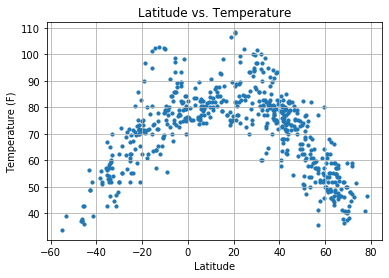

In [10]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], marker = "o", s = 10)

# Labels
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# plt.savefig("Output_SPlots/Temp_vs_Latitude.png")

plt.show()

## Latitude vs. Humidity Plot

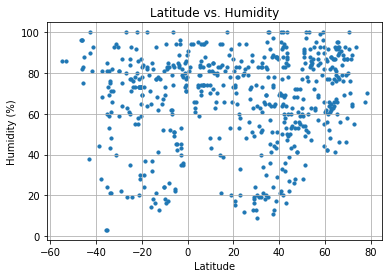

In [11]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], marker = "o", s = 10)

# Labels
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
# plt.savefig("Output_SPlots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

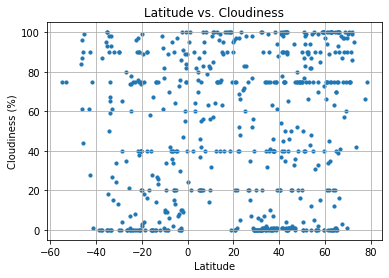

In [12]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], marker = "o", s = 10)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
# plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

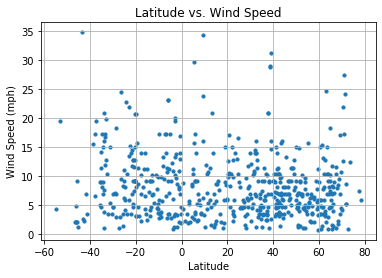

In [13]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], marker = "o", s = 10)

# Labels
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
# plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

northern_df = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]).astype(float) > 0, :]
southern_df = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]).astype(float) < 0, :]


In [16]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    linregress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,linregress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
#     plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7576605552780054


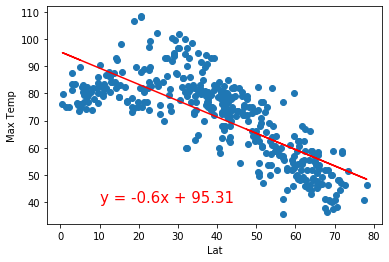

In [17]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (10,40)
plotLinearRegression(northern_df[xlbl],northern_df[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7946310438814493


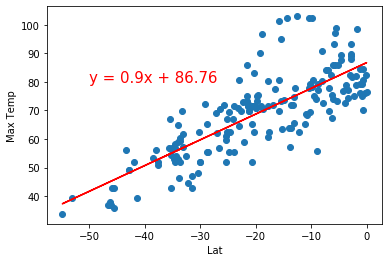

In [18]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-50,80)
plotLinearRegression(southern_df[xlbl],southern_df[ylbl],xlbl,ylbl,lblpos,5)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08045995548144187


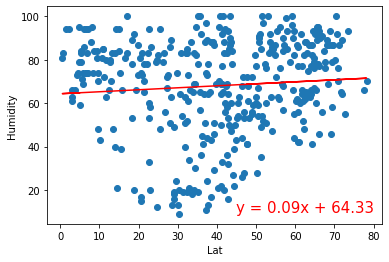

In [19]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(northern_df[xlbl],northern_df[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.09305163103389597


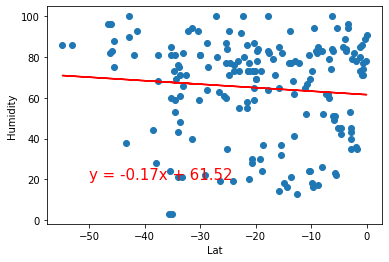

In [20]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-50,20)
plotLinearRegression(southern_df[xlbl],southern_df[ylbl],xlbl,ylbl,lblpos,5)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04081467119008947


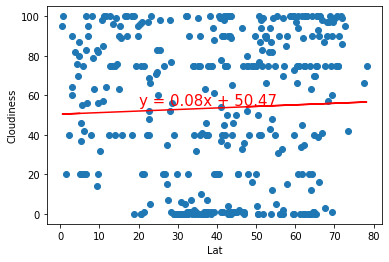

In [21]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,55)
plotLinearRegression(northern_df[xlbl],northern_df[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.12462629245446182


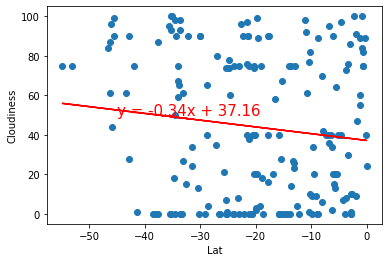

In [22]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-45,50)
plotLinearRegression(southern_df[xlbl],southern_df[ylbl],xlbl,ylbl,lblpos,5)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.03408794371471237


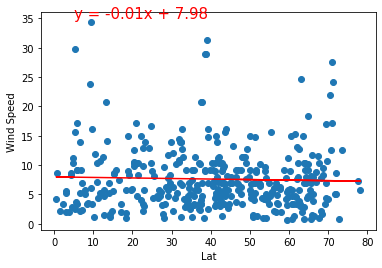

In [23]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (5,35)
plotLinearRegression(northern_df[xlbl],northern_df[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.03484560698079441


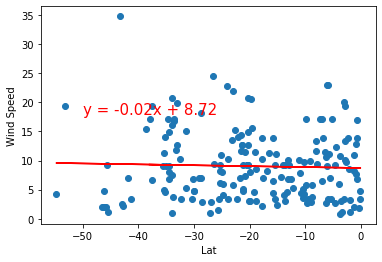

In [24]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-50,18)
plotLinearRegression(southern_df[xlbl],southern_df[ylbl],xlbl,ylbl,lblpos,5)